In [184]:
import mysql.connector

In [185]:
serverName = "awqiquant01.dev.hoopp.cloud"

cnx = mysql.connector.connect(user='quant', password='Password2017',
                              host=serverName,
                              database='cds_basis_trade')
cursor = cnx.cursor()

In [186]:
import urllib.request

urllib.request.urlopen("http://" + serverName + ":8940/CurveOverride/setOverride/US00101JAK25/4/50/")
urllib.request.urlopen("http://" + serverName + ":8940/CurveOverride/setOverride/US00101JAK25/7/150/")
urllib.request.urlopen("http://" + serverName + ":8940/CurveOverride/setOverride/US00101JAK25/9/164/")

In [187]:
query = ("SELECT tenor, cds_spread_value, final_spread_value FROM `stream.cds_curve_point` WHERE isin = 'US00101JAK25' order by tenor")

In [188]:
cursor.execute(query)
result = cursor.fetchall()

for row in result:
    print (row)

(Decimal('2.0'), Decimal('25.1486'), Decimal('25.1486'))
(Decimal('2.5'), Decimal('31.7846'), Decimal('31.7846'))
(Decimal('3.0'), Decimal('41.6162'), Decimal('41.6162'))
(Decimal('3.5'), Decimal('54.5632'), Decimal('46.8000'))
(Decimal('4.0'), Decimal('70.7682'), Decimal('50.0000'))
(Decimal('4.5'), Decimal('85.3340'), Decimal('69.7295'))
(Decimal('5.0'), Decimal('100.0000'), Decimal('100.0000'))
(Decimal('5.5'), Decimal('114.4942'), Decimal('114.4942'))
(Decimal('6.0'), Decimal('129.0133'), Decimal('129.0133'))
(Decimal('6.5'), Decimal('143.4774'), Decimal('143.4774'))
(Decimal('7.0'), Decimal('157.8867'), Decimal('150.0000'))
(Decimal('7.5'), Decimal('165.9795'), Decimal('157.7664'))
(Decimal('8.0'), Decimal('171.5766'), Decimal('163.6935'))
(Decimal('8.5'), Decimal('174.6167'), Decimal('167.7163'))
(Decimal('9.0'), Decimal('175.1332'), Decimal('164.0000'))
(Decimal('9.5'), Decimal('173.1205'), Decimal('173.1205'))
(Decimal('10.0'), Decimal('168.5566'), Decimal('168.5566'))


In [189]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Text(0.5,0,'tenor')

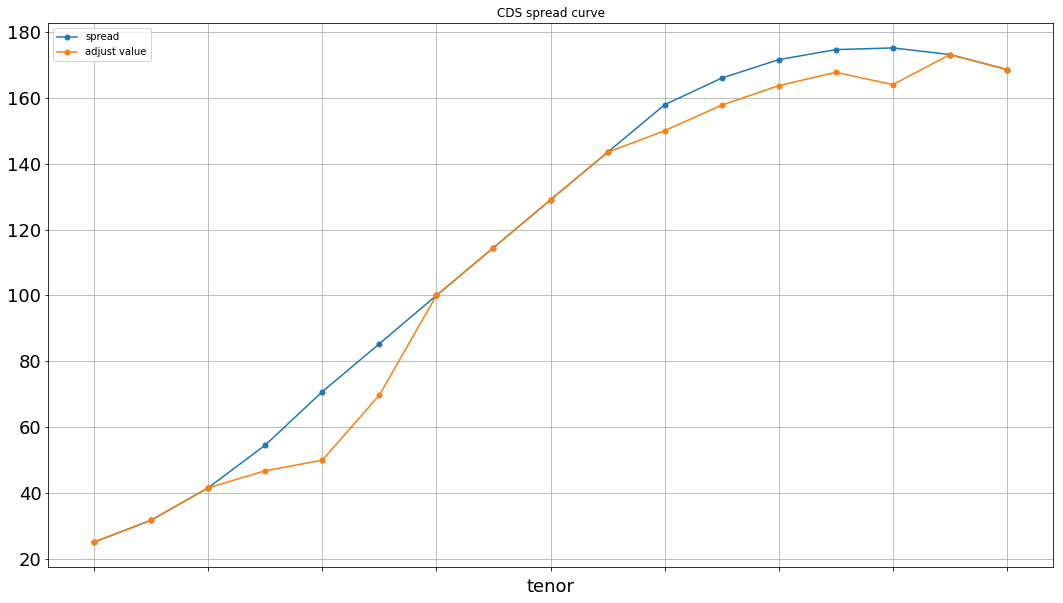

In [190]:
# push data into a dataframe
dft = pd.DataFrame(([row[1], row[2]] for row in result),
                   columns=['spread', 'adjust value'], 
                   index=(row[0] for row in result),
                   dtype=np.float)
dft
# setup chart format
ax = dft[["spread", "adjust value"]].plot.line(grid='true', figsize=(18,10), title='CDS spread curve', 
                                          marker=".", markersize=10, fontsize=18)
ax.set_xlabel('tenor', fontsize=18)



In [160]:
df = pd.DataFrame([cln for cln in row] for row in result)
df.rename(columns={0:'tenor', 1:'spread', 2:'adjust value'}, inplace=True)
df.set_index('tenor', inplace=True)
#df.sort_values('tenor')
df

KeyError: 'tenor'

In [161]:
df = df.convert_objects(convert_numeric=True)
#pd.to_numeric(df["spread"])
#pd.to_numeric(df["adjust value"])


C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [162]:

#df.infer_objects()
df[["spread", "adjust value"]].plot()

KeyError: "['spread' 'adjust value'] not in index"